## 파형시각화

sampling Frequency: 16000 [Hz]
sampling Size: 2 [Byte]
Number of Channels: 1 
Number of Samples: 51040 


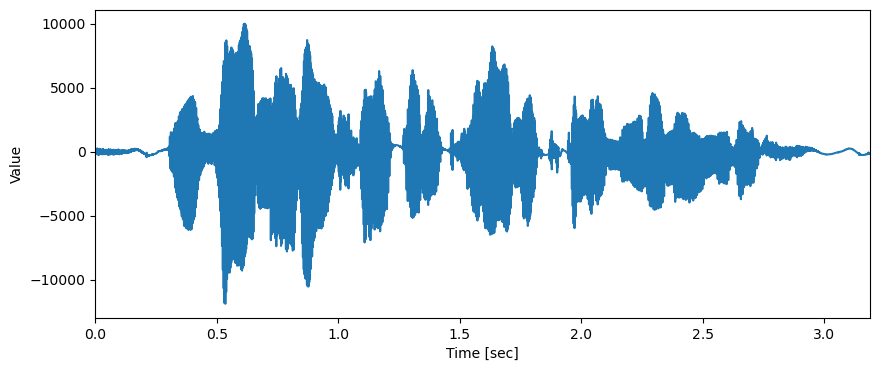

In [22]:
import wave
import numpy as np
import matplotlib.pyplot as plt

if __name__=='__main__':
    
    wav_file='./data/wav/BASIC5000_0001.wav'
    out_plot='./plot_png'
    
    with wave.open(wav_file) as wav:
        sampling_frequency=wav.getframerate()#주파수 확인 [Hz]
        
        sampling_size=wav.getsampwidth()#샘플 사이즈 확인 [Byte]
        
        num_channels=wav.getnchannels()#채널수 확인
        num_samples=wav.getnframes() #wav 샘플 수 확인
        waveform=wav.readframes(num_samples)#wav data 읽기, 각샘플의 음압치
        waveform=np.frombuffer(waveform, dtype=np.int16)# 16/8-->2 음압치 이산화
        
    print(f'sampling Frequency: {sampling_frequency} [Hz]')#1초안에 포함되는 주파수
    print(f'sampling Size: {sampling_size} [Byte]')
    print(f'Number of Channels: {num_channels} ')
    print(f'Number of Samples: {num_samples} ')
    
    time_axis=np.arange(num_samples)/sampling_frequency# 총샘플 길이수/1초안에 포함되는 샘플수==>51,040/16000=3.19초
    plt.figure(figsize=(10,4))
    plt.plot(time_axis, waveform)
    plt.xlabel("Time [sec]")
    plt.ylabel("Value")
    plt.xlim([0, num_samples / sampling_frequency])
    plt.savefig(out_plot)
    

C:\Users\2469l\AppData\Local\Temp\ipykernel_12048\1579138962.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target_index=np.int(target_time * sampling_frequency)#분석시간을 샘플 번호로 변환
C:\Users\2469l\AppData\Local\Temp\ipykernel_12048\1579138962.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your

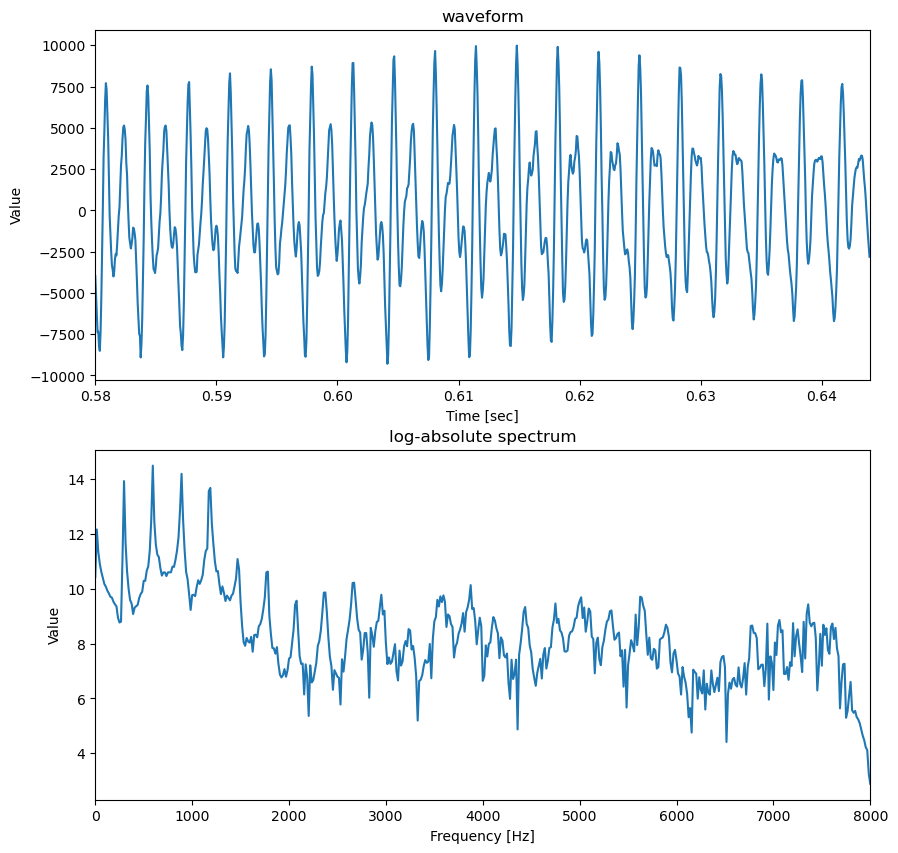

In [13]:
import wave
import numpy as np
import matplotlib.pyplot as plt

if __name__=="__main__":
    #wav파일 열기
    wav_file="./data/wav/BASIC5000_0001.wav"
    target_time=0.58 #분석시각.BASIC5000_0001.wav에서는 아래 시각에 음소 "o"를 발화
    
    fft_size=1024# FFT한 범위의 샘플 수 ->2의 제곱수
    out_plot="./spectrum.png"#시각화한 결과
    
    #wav 파일을 열고 아래와 같은 코드를 수행
    with wave.open(wav_file) as wav:
        sampling_frequency=wav.getframerate()#sampling 주파수[Hz] 확인
        
        waveform=wav.readframes(wav.getnframes())#wav 읽기
        
        waveform=np.frombuffer(waveform, dtype=np.int16)#읽어온 데이터는 바이너리 값(16bit interger)
        #수치(정수)로 변환한다
        target_index=np.int(target_time * sampling_frequency)#분석시간을 샘플 번호로 변환
        
        frame=waveform[target_index:target_index + fft_size]#FFT를 실행하는 만큼 파형데이터 도출
        spectrum=np.fft.fft(frame)#FFT 적용
        
        absolute=np.abs(spectrum)#진폭스펙트럼 확인
        
        absolute=absolute[:np.int(fft_size/2)+1]#진폭 스펙트럼은 좌우 대칭이므로 반만 이용
        
        log_absolute=np.log(absolute + 1E-7)#로그 함수 취하고, 로그 진폭 스펙트럼 계산
        
        plt.figure(figsize=(10,10))#시간 파형과 로그 진폭 스펙트럼을 시각화, 시각화 영역 생성
        plt.subplot(2,1,1)#그림영역을 종으로 2분할, 위쪽에 시간 파형 그림
        
        time_axis= target_time+np.arange(fft_size)/sampling_frequency#가로축(주파수축) 만들기 시간=
        plt.plot(time_axis,frame)#시간파형 plot
        plt.title('waveform')
        plt.xlabel('Time [sec]')
        plt.ylabel('Value')
        plt.xlim([target_time, target_time +fft_size / sampling_frequency])
        
        
        plt.subplot(2,1,2)#2분할한 그림 영역 밑에 로그 진폭 스펙트럼 그림
        freq_axis=np.arange(np.int(fft_size/2)+1)*sampling_frequency /fft_size
        plt.plot(freq_axis, log_absolute)#로그 진폭 스펙트럼 시각화
        plt.title('log-absolute spectrum')#시각화한 그림에 제목과 횡축,종축 라벨 정의
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Value')
        plt.xlim([0, sampling_frequency / 2])#횡축 영역을 0~최대주파수로 제한
        
        plt.savefig(out_plot)
        
        